In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [334]:
df_training = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_training

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,NORMAL,0.000000,0.000000,0.000000,0.000000
1,0.101741,0.777568,0.054902,NORMAL,-0.636737,1.006023,0.050871,0.388784
2,0.158470,0.345891,0.014584,NORMAL,0.056728,-0.431676,0.079235,0.172946
3,0.308851,0.239022,-0.072769,NORMAL,-0.543828,0.655800,0.154425,0.119511
4,0.163595,0.475107,-0.061163,NORMAL,0.768208,-0.365124,0.081798,0.237554
...,...,...,...,...,...,...,...,...
965,0.872744,0.801287,-0.139964,SLOW,-0.857083,0.085469,0.436372,0.400644
966,1.464669,0.226299,-0.170508,SLOW,0.591925,-0.574988,0.732334,0.113149
967,1.587379,0.583067,-0.196164,SLOW,0.122710,0.356769,0.793690,0.291534
968,0.319258,0.272088,-0.062385,SLOW,-0.383045,1.202910,0.159629,0.136044


In [335]:
df_training.isna().sum()

AccX        0
AccY        0
GyroZ       0
Class       0
DiffAccX    0
DiffAccY    0
VelX        0
VelY        0
dtype: int64

## Change categories to numbers

In [336]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,0,0.000000,0.000000,0.000000,0.000000
1,0.101741,0.777568,0.054902,0,-0.636737,1.006023,0.050871,0.388784
2,0.158470,0.345891,0.014584,0,0.056728,-0.431676,0.079235,0.172946
3,0.308851,0.239022,-0.072769,0,-0.543828,0.655800,0.154425,0.119511
4,0.163595,0.475107,-0.061163,0,0.768208,-0.365124,0.081798,0.237554
...,...,...,...,...,...,...,...,...
965,0.872744,0.801287,-0.139964,2,-0.857083,0.085469,0.436372,0.400644
966,1.464669,0.226299,-0.170508,2,0.591925,-0.574988,0.732334,0.113149
967,1.587379,0.583067,-0.196164,2,0.122710,0.356769,0.793690,0.291534
968,0.319258,0.272088,-0.062385,2,-0.383045,1.202910,0.159629,0.136044


### Only select normal and aggressive values

In [337]:
df_training = df_training.loc[df_training['Class'] != 1]
df_test = df_test.loc[df_test['Class'] != 1]

df_training

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,0,0.000000,0.000000,0.000000,0.000000
1,0.101741,0.777568,0.054902,0,-0.636737,1.006023,0.050871,0.388784
2,0.158470,0.345891,0.014584,0,0.056728,-0.431676,0.079235,0.172946
3,0.308851,0.239022,-0.072769,0,-0.543828,0.655800,0.154425,0.119511
4,0.163595,0.475107,-0.061163,0,0.768208,-0.365124,0.081798,0.237554
...,...,...,...,...,...,...,...,...
965,0.872744,0.801287,-0.139964,2,-0.857083,0.085469,0.436372,0.400644
966,1.464669,0.226299,-0.170508,2,0.591925,-0.574988,0.732334,0.113149
967,1.587379,0.583067,-0.196164,2,0.122710,0.356769,0.793690,0.291534
968,0.319258,0.272088,-0.062385,2,-0.383045,1.202910,0.159629,0.136044


## Normalize the data

In [338]:
X_training = df_training.drop(columns=["Class"])
X_training = (X_training - X_training.mean()) / X_training.std() * 100

X_training["Class"] = df_training["Class"]
X_training

,AccX,AccY,GyroZ,DiffAccX,DiffAccY,VelX,VelY,Class
0,-122.106111,-116.257157,117.650694,-63.187997,-66.096361,-122.106111,-116.257157,0
1,-105.031605,25.635205,68.160440,-138.430213,46.047826,-105.031605,25.635205,0
2,-95.511253,-53.138133,25.740221,-56.484482,-114.216534,-95.511253,-53.138133,0
3,-70.273807,-72.639801,-66.170252,-127.451292,7.007516,-70.273807,-72.639801,0
4,-94.651012,-29.558503,-53.958370,27.589927,-106.797697,-94.651012,-29.558503,0
...,...,...,...,...,...,...,...,...
965,24.360574,29.963614,-136.870621,-164.468147,-56.568906,24.360574,29.963614,2
966,123.699233,-74.961611,-169.007148,6.758805,-130.191905,123.699233,-74.961611,2
967,144.292810,-9.857655,-196.001833,-48.687551,-26.326386,144.292810,-9.857655,2
968,-68.527317,-66.605896,-55.243834,-108.451868,67.995301,-68.527317,-66.605896,2


In [339]:
X_testing = df_test.drop(columns="Class")
X_testing = (X_testing - X_testing.mean()) / X_testing.std() * 100

X_testing["Class"] = df_test["Class"]
X_testing

,AccX,AccY,GyroZ,DiffAccX,DiffAccY,VelX,VelY,Class
814,79.340838,21.963793,38.859198,4.511762,78.994793,79.340838,21.963793,0
815,132.192943,569.257650,-11.298662,43.314646,415.888708,132.192943,569.257650,0
816,-33.998774,10.843662,-4.956864,-136.351589,-424.416667,-33.998774,10.843662,0
817,38.437952,57.366915,1.961463,59.378533,35.317808,38.437952,57.366915,0
818,-21.053767,3.156469,-25.711843,-48.833088,-41.236835,-21.053767,3.156469,0
...,...,...,...,...,...,...,...,...
3079,-95.464081,-76.862781,479.325902,-79.996459,-1.185708,-95.464081,-76.862781,2
3080,180.478081,51.148641,-645.478582,226.299722,97.246415,180.478081,51.148641,2
3081,151.492731,-217.785674,-450.612340,-23.810860,-204.420646,151.492731,-217.785674,2
3082,105.929590,84.125864,374.398012,-37.408456,229.405378,105.929590,84.125864,2


## Train model

In [340]:
X_train = X_training.drop(columns="Class")
y_train = X_training.Class

X_test = X_testing.drop(columns="Class")
y_test = X_testing.Class

In [341]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
xgb = GradientBoostingClassifier()

param_grid = {'n_estimators': np.arange(20, 80, 2), 'learning_rate': np.linspace(0.1, 0.8, 20), 'max_depth': np.arange(2, 10), 'max_features': ['sqrt', None], 'max_leaf_nodes': np.arange(2, 30)}

xgb_gscv = RandomizedSearchCV(xgb, param_grid, n_iter=200, cv=10, verbose=10, n_jobs=10, random_state=0)
xgb_gscv.fit(X_train, y_train)

In [343]:
best_params = xgb_gscv.best_params_
best_params

{'n_estimators': 60,
 'max_leaf_nodes': 18,
 'max_features': 'sqrt',
 'max_depth': 9,
 'learning_rate': 0.46842105263157896}

In [344]:
xgb_gscv.best_score_

0.5206036217303822

### Check for overfitting

In [345]:
xgb_gscv.score(X_train, y_train)

1.0

In [346]:
xgb_gscv.score(X_test, y_test)

0.5162995594713656

In [347]:
classes = ["NORMAL", "AGGRESSIVE"]

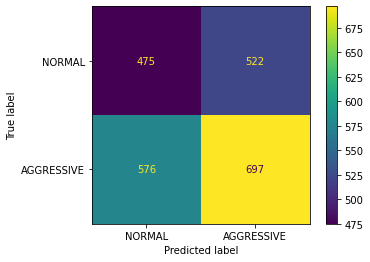

In [348]:
y_pred = xgb_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

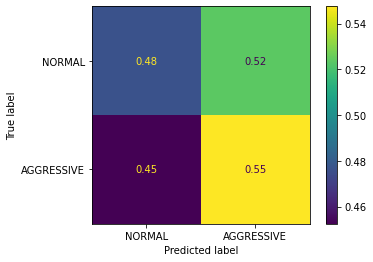

In [349]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [350]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

base_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = xgb_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (random_accuracy - base_accuracy) / base_accuracy:.3f}%.')

Model Performance
Accuracy = 0.531%.
Model Performance
Accuracy = 0.516%.
Improvement of -2.819%.
